# 1 Author

**Student Name**: Hesong Wang  
**Student ID**:  210977062



# 2 Problem formulation

**Background and Motivation**:
Facial expressions are a rich source of non-verbal communication and have been extensively studied in fields ranging from psychology to computer vision. The Genki4K dataset, comprising thousands of labeled facial images, presents an opportunity to explore the intrinsic patterns and structures of facial expressions beyond the confines of pre-defined categories.

**Research Objective**:
The primary objective of this study is to explore and identify latent structures within the Genki4K dataset through unsupervised learning methods. By doing so, the research aims to reveal underlying patterns and clusters in facial expressions that are not bound by labeled emotion categories, potentially leading to new insights into human emotional expression.

**Challenges**:
The main challenges in this study include the high-dimensional nature of image data, the subtlety and complexity of facial expressions, and the need to distill meaningful insights from unsupervised models which do not rely on labeled data for guidance.

**Methodology**:
To address these challenges, we employ advanced unsupervised learning techniques, including dimensionality reduction methods like PCA and t-SNE, followed by clustering algorithms such as K-Means, Spectral Clustering, and Gaussian Mixture Models. These methods allow us to reduce the complexity of the data and identify clusters or groups within the facial expressions that may correspond to distinct emotional states or features.

**Expected Outcomes**:
We anticipate that this exploration will yield distinct clusters of facial expressions, offering a novel perspective on how emotions might be represented in a multi-dimensional space. This could potentially challenge or refine existing theories of emotional categorization in facial expressions. Additionally, insights gained from this study could inform the development of more nuanced emotion recognition systems and contribute to interdisciplinary understanding in psychology, affective computing, and beyond.

# 3 Machine Learning pipeline

### **My ML Pipeline**:
   Load data -> Transform data -> Extract and process features -> Unsupervised learning -> Evaluate the results

#### 1. **Input**:
   - **Data**: The Genki4K dataset, consisting of facial images.
   - **Pre-trained Models**: Pre-trained neural network models like ResNet and VGGNet.

#### 2. **Data Preprocessing and Feature Extraction**:
   - **Preprocessing**: Standardizing or normalizing images if necessary.
   - **Feature Extraction**: Using pre-trained models to extract features from images. This involves passing images through the network and using outputs from one of the final layers (omitting the classification layer) to get a feature representation of each image.

#### 3. **Dimensionality Reduction**:
   - **Techniques Used**: Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are used for reducing the dimensionality of the extracted features.
   - **Purpose**: To reduce the high-dimensional feature space to a lower-dimensional space (2D or 3D) for better visualization and to facilitate clustering.

#### 4. **Clustering**:
   - **Algorithms**: Clustering algorithms like K-Means, Spectral Clustering, and Gaussian Mixture Models are applied to the lower-dimensional data.
   - **Goal**: To group images into clusters based on the similarity of their features.

#### 5. **Evaluation and Visualization**:
   - **Visualization**: The clusters are visualized in the reduced feature space to analyze the grouping.
   - **Interpretation**: Exploring how different images are grouped together and understanding the characteristics of each cluster.

#### 6. **Output**:
   - **Cluster Labels**: Each image in the dataset is assigned a cluster label, indicating which group it belongs to.
   - **Visual Representations**: Graphical plots showing the distribution and grouping of the data in the reduced feature space.

### **Intermediate Data Flow**:
   - From the **Data Preprocessing** stage, pre-processed images are fed into the **Feature Extraction** stage.
   - Extracted features are then passed through **Dimensionality Reduction** techniques.
   - The lower-dimensional data is used in the **Clustering** stage.
   - Finally, the **Evaluation and Visualization** stage utilizes the clustering results for analysis and representation.

This pipeline represents a comprehensive approach to understanding and categorizing facial expressions in an unsupervised manner, leveraging the power of deep learning for feature extraction and advanced algorithms for clustering.


# 4 Transformation stage


### 1. Image Transformation
- **Input**: Raw images from the Genki4K dataset.
- **Output**: Transformed images that are resized to 224x224 pixels and converted to PyTorch tensors.
- **Purpose**: 
   - **Resizing**: Pre-trained models (like those you might use for feature extraction) typically require input images of a specific size. Resizing images to 224x224 ensures compatibility with these models.
   - **ToTensor**: This converts the PIL Image or a NumPy array to a FloatTensor and scales the image's pixel intensity values in the range [0., 1.]. It's a necessary step for feeding images into a PyTorch model.


In [167]:
import torch
from torchvision.transforms import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for pre-trained models
    transforms.ToTensor()
])

### 2. Feature Extraction
- **Input**: Transformed images loaded through a dataloader.
- **Output**: An array of feature vectors extracted by the provided model.
- **Purpose**:
   - The function `extract_features` passes images through a neural network model (such as a pre-trained ResNet or VGGNet) to extract high-level feature representations of these images. 
   - The feature vectors are useful for various machine learning tasks because they encapsulate critical information about the images in a more compact and informative way than raw pixel data.
   - The feature vectors are detached from the GPU (`output.cpu()`) and converted to a NumPy array for compatibility with subsequent non-PyTorch processing steps, such as clustering or similarity comparison.


In [168]:
# Function to extract features
def extract_features(dataloader, model):
    features = []
    with torch.no_grad():
        for images in dataloader:
            # Move images to the same device as the model
            images = images.to(device)
            output = model(images)
            # Move the features to CPU for further processing
            features.append(output.cpu())

    return torch.cat(features).numpy()

### Why These Transformations?
- **Compatibility with Pre-trained Models**: Pre-trained models on platforms like PyTorch usually require input data in a specific format (like tensor) and size. The preprocessing step ensures that the raw image data meets these requirements.
- **Effective Feature Representation**: The feature extraction stage leverages the power of deep neural networks to obtain a meaningful and compact representation of the raw images, which is crucial for effective performance in various machine learning tasks, including clustering and similarity analysis.
- **Scalability and Efficiency**: Working with raw image data, especially in high dimensions, can be computationally expensive and inefficient. By extracting and using feature vectors, we significantly reduce the computational burden and improve the scalability of the process.

# 5 Modelling

1. **VGGNet (VGG11)**:
   - **Description**: Part of the VGG family known for its simplicity and depth. VGG11 is the variant with 11 layers.
   - **Reason for Choice**: Despite being relatively simpler and deeper, it's quite effective in feature extraction for image classification. It's a good choice if you prioritize model interpretability and simplicity.

2. **ResNet18**:
   - **Description**: A variant of the ResNet model, which is known for its deep architecture and residual connections that help in training deeper networks. ResNet18 is a lighter version with 18 layers.
   - **Reason for Choice**: Offers a good balance between performance and computational efficiency. Ideal for feature extraction in general image classification tasks.

3. **MobileNetV2**:
   - **Description**: An efficient model optimized for mobile and edge devices. It uses depthwise separable convolutions to provide lightweight deep neural networks.
   - **Reason for Choice**: If computational resources are a concern, or for applications requiring model deployment on devices with limited computational power, MobileNetV2 is an excellent choice.

4. **GoogLeNet (InceptionV1)**:
   - **Description**: This model introduced the concept of 'Inception modules', which significantly increased the depth and width of the network while keeping computational requirements in check.
   - **Reason for Choice**: Known for its efficiency and relatively lower computational cost compared to its depth. Suitable for a variety of image recognition tasks with good accuracy.

5. **InceptionResnetV1 (from facenet_pytorch)**:
   - **Description**: This model combines the Inception architecture with ResNet, known for its ability to learn rich feature representations. It's pretrained on the 'vggface2' dataset, a large-scale face recognition dataset.
   - **Reason for Choice**: Excellent for face recognition and facial feature extraction tasks due to its architecture and pretraining on a face dataset. It's particularly useful if your focus is on detailed aspects of facial images, like expressions or identity recognition.

### Summary and Considerations:
- **Diverse Choices for Different Needs**: These selections cover a range of models from lightweight (MobileNetV2) to more complex (InceptionResnetV1), catering to different computational and application needs.
- **Facial Feature Extraction**: InceptionResnetV1 is specifically suited for facial recognition tasks, while the others are more generalist in their application.
- **Trade-offs**: There's always a trade-off between model complexity, computational cost, and performance. Lighter models are faster but may be less accurate in complex tasks, whereas heavier models are more accurate but computationally expensive.

These models are chosen for their proven effectiveness in various image processing tasks. The choice of model(s) in a machine learning project is crucial and should align with the specific requirements and constraints of the task at hand.

In [ ]:
from torchvision import models
import facenet_pytorch

vggnet = models.vgg11(pretrained = True)
resnet18 = models.resnet18(pretrained = True)
mobilenet = models.mobilenet_v2(pretrained = True)
googlenet = models.googlenet(pretrained = True)
incepResnet = facenet_pytorch.InceptionResnetV1(pretrained='vggface2')

vggnet.to(device)
resnet18.to(device)
mobilenet.to(device)
googlenet.to(device)
incepResnet.to(device)


# 6 Methodology

### Methodology Overview:

#### 1. **Training and Validation Approach**:

- **Feature Extraction**:
  - Utilize pre-trained models like InceptionResnetV1, ResNet18, GoogLeNet, MobileNet, and VGGNet to extract features from the facial images. 
  - This step does not involve traditional 'training' as the models are already pre-trained. Instead, it's about leveraging these models to transform raw images into a meaningful feature space.

- **Clustering and Similarity Analysis**:
  - Apply clustering algorithms (K-Means, Gaussian Mixture Models, or Spectral Clustering) to these features to group similar images.
  - Use cosine similarity to find similar faces within the dataset based on their feature vectors.

- **Dimensionality Reduction for Visualization**:
  - Employ techniques like t-SNE and PCA for visualizing the high-dimensional feature space in two or three dimensions, aiding in the interpretability of clusters and similar images.

- **No Explicit Validation Stage**:
  - In unsupervised learning, especially in clustering and similarity tasks, there is no explicit validation stage using labeled data. The validation comes from assessing the coherence and relevance of the clusters or similarity groupings formed.

#### 2. **Model Performance Assessment**:

- **Visualization**:
  - Visual inspection of clusters in the reduced feature space (using t-SNE or PCA plots). This helps to qualitatively assess how well the clusters are formed.

- **Similarity Assessment**:
  - For similarity analysis, the validation is more subjective and can be based on visually inspecting the similar images retrieved for a given reference image.

#### 3. **Further Considerations**:

- **Iterative Refinement**:
  - The process might require iterative refinement by tuning parameters of the clustering algorithms or choosing different pre-trained models based on the initial results.

- **Human-in-the-loop**:
  - For tasks like facial similarity, human judgment can play a role in validating the results, especially when assessing the practical relevance of the findings.


In [170]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering


def cluster(dataloader, model, dim_reducer):
    model.eval()
    n_clusters = 2

    # Extract features
    features = extract_features(dataloader, model)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=2)  # You can choose the number of clusters
    cluster_labels = kmeans.fit_predict(features)

    # # Apply Gaussian Mixture Model clustering
    # gmm = GaussianMixture(n_components=2)  # You can choose the number of clusters
    # gmm.fit(features)
    # cluster_labels = gmm.predict(features)

    # # Apply Spectral Clustering
    # spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')  
    # cluster_labels = spectral.fit_predict(features)
    

    # Reduce the feature dimensions to 2D 
    reduced_features = None
    if dim_reducer == 'TSNE':
        tsne = TSNE(n_components=2, random_state=0)
        reduced_features = tsne.fit_transform(features)
        plot_title = 't-SNE Visualization'
    elif dim_reducer == 'PCA':
        pca = PCA(n_components=2)
        reduced_features = pca.fit_transform(features)
        plot_title = 'PCA Visualization'
    else:
        raise ValueError("Invalid dimensionality reducer. Choose 'TSNE' or 'PCA'.")

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        # Select only data points that belong to the current cluster
        indices = cluster_labels == i
        plt.scatter(reduced_features[indices, 0], reduced_features[indices, 1], label=f'Cluster {i}')

    plt.legend()
    plt.title(plot_title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return cluster_labels

def show_cluster_examples(dataloader, cluster_labels, n_examples=3):
    """
    Show n_examples images from each of the two clusters.

    :param dataloader: DataLoader for the dataset.
    :param cluster_labels: Array of cluster labels for each image.
    :param n_examples: Number of examples to show per cluster.
    """
    # Create a list of image tensors for each cluster (2 clusters)
    cluster_images = [[] for _ in range(2)]

    # Iterate over images and labels to populate cluster_images
    for batch_idx, images in enumerate(dataloader):
        for img_idx, img in enumerate(images):
            # Calculate the overall index of the image in the dataset
            overall_idx = batch_idx * dataloader.batch_size + img_idx
            if overall_idx < len(cluster_labels):
                label = cluster_labels[overall_idx]
                cluster_images[label].append(img)
                if len(cluster_images[label]) >= n_examples:
                    break

    # Plot examples
    fig, axs = plt.subplots(2, n_examples, figsize=(n_examples * 2, 2 * 2))
    for i, imgs in enumerate(cluster_images):
        for j in range(n_examples):
            if j < len(imgs):
                axs[i, j].imshow(imgs[j].permute(1, 2, 0))  # Convert from PyTorch tensor to image
                axs[i, j].axis('off')
            axs[i, j].set_title(f"Cluster {i} Example {j+1}")
    plt.tight_layout()
    plt.show()

def find_similar_faces(target_feature, features, top_k=15):
    """
    Find top k similar faces based on cosine similarity.
    Args:
        target_feature (np.ndarray): Feature vector of the target face.
        features (np.ndarray): Feature vectors of all faces.
        top_k (int): Number of top similar faces to find.
    Returns:
        np.ndarray: Indices of top k similar faces.
    """
    similarities = cosine_similarity([target_feature], features)[0]
    top_indices = np.argsort(similarities)[::-1][1:top_k+1]  # Exclude target itself
    return top_indices

def cluster_similar_faces(dataloader, model):
    # Define the reference face and find the top similar faces
    reference_index = 49  # For example, using the first image as a reference
    features = extract_features(dataloader, model=model)
    similar_indices = find_similar_faces(features[reference_index], features, top_k=50)
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)

    # Plotting the entire dataset
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_features[:, 0], reduced_features[:, 1], color='grey', alpha=0.5)

    # Highlight the similar faces
    for i, idx in enumerate(similar_indices[21:]):
        plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], color='green', s=100, edgecolor='k', label=f'Similar Face Top-50' if i == 0 else "")
    for i, idx in enumerate(similar_indices[:20]):
        plt.scatter(reduced_features[idx, 0], reduced_features[idx, 1], color='blue', s=100, edgecolor='k', label=f'Similar Face Top-20' if i == 0 else "")

    # Highlight the reference face
    plt.scatter(reduced_features[reference_index, 0], reduced_features[reference_index, 1], color='red', s=100, edgecolor='k', label='Reference Face')

    plt.legend()
    plt.title('t-SNE visualization of Image Features with Similar Faces Highlighted')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.show()

    return similar_indices

def show_similar_examples(dataloader, similar_indices, n_examples=50, reference_index=49):
    """
    Show the reference image and n_examples most similar images.

    :param dataloader: DataLoader for the dataset.
    :param reference_index: Index of the reference image in the dataset.
    :param similar_indices: Indices of similar images to the reference image.
    :param n_examples: Number of similar examples to show.
    """
    # Retrieve the reference image
    reference_img = dataloader.dataset[reference_index]

    # Retrieve similar images
    similar_imgs = [dataloader.dataset[idx] for idx in similar_indices[:n_examples]]

    # Plot the reference and similar images
    fig, axs = plt.subplots(1, n_examples + 1, figsize=((n_examples + 1) * 2, 2))  # 1 row, n_examples + 1 columns

    # Show the reference image
    axs[0].imshow(reference_img.permute(1, 2, 0))  # Convert from PyTorch tensor to image
    axs[0].axis('off')
    axs[0].set_title("Reference Image")

    # Show similar images
    for i, img in enumerate(similar_imgs):
        axs[i + 1].imshow(img.permute(1, 2, 0))  # Convert from PyTorch tensor to image
        axs[i + 1].axis('off')
        axs[i + 1].set_title(f"Similar {i + 1}")

    plt.tight_layout()
    plt.show()





# 7 Dataset

### Dataset Overview:

- **Dataset**: Genki4K
- **Content**: The Genki4K dataset consists of 4000 facial images. These images are typically used for emotion recognition, facial feature analysis, or other facial recognition tasks.
- **Purpose**: In this context, it's used for unsupervised learning, specifically to explore facial expressions or characteristics without explicit labeling.

### Preprocessing Steps:

1. **File Reading and Conversion**:
   - The `Genki4kDataset` class reads images from a specified folder path, converting each image to RGB format, which ensures consistency in color channels across all images.

2. **Image Transformations**:
   - The dataset class accepts a `transform` parameter, which is applied to each image. This can include standard preprocessing steps such as resizing (important for compatibility with pre-trained models), normalization, and conversion to tensors.
   - In the provided code snippet, a transformation sequence is defined to resize images to 224x224 and convert them to tensors.

3. **Dataset Loading**:
   - The dataset is loaded and managed using PyTorch's `Dataset` class, which provides an efficient way to iterate over the data in minibatches during the feature extraction process.



In [171]:
import os
from torch.utils.data import Dataset
from PIL import Image

class Genki4kDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        """
        Initialize the dataset.
        :param folder_path: Path to the folder containing the dataset.
        :param transform: Transformations to be applied to the images.
        """
        self.folder_path = folder_path
        self.transform = transform
        # List all jpg files in the folder
        self.images = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]

    def __len__(self):
        """
        Return the number of images in the dataset.
        """
        return len(self.images)

    def __getitem__(self, idx):
        """
        Fetch an image by its index.
        :param idx: Index of the image to be fetched.
        :return: Transformed image.
        """
        img_path = os.path.join(self.folder_path, self.images[idx])
        # Open the image and convert it to RGB
        image = Image.open(img_path).convert('RGB')

        # Apply the transformations if any
        if self.transform:
            image = self.transform(image)

        return image
    
    def get_image_path(self, idx):
        """
        Get the file path of the image at the specified index.
        :param idx: Index of the image.
        :return: File path of the image.
        """
        return os.path.join(self.folder_path, self.images[idx])

# 8 Results

### We mainly conducted experiments in three aspects:

1. **Explore the impact of different neural networks on unsupervised learning;**
2. **Explore the impact of different dimensionality reduction algorithms on unsupervised learning;**
3. **Exploring the application of unsupervised learning: similar face recognition.**

Among them, we studied five different neural network models, they are:

- VGGNet
- ResNet18
- MobileNet
- GoogLeNet
- InceptionResnetV1

And two different dimensionality reduction algorithms, they are:

- t-SNE
- PCA

When exploring the application of unsupervised learning, based on the performance of different models and algorithms in experiments, we selected the **InceptionResnetV1 model** and **t-SNE dimensionality reduction algorithm** for similar face recognition.


### First we **load the dataset**: 

In [172]:
from torch.utils.data import DataLoader

dataset = Genki4kDataset('genki4k/files', transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

### For **VGGNet**: 

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


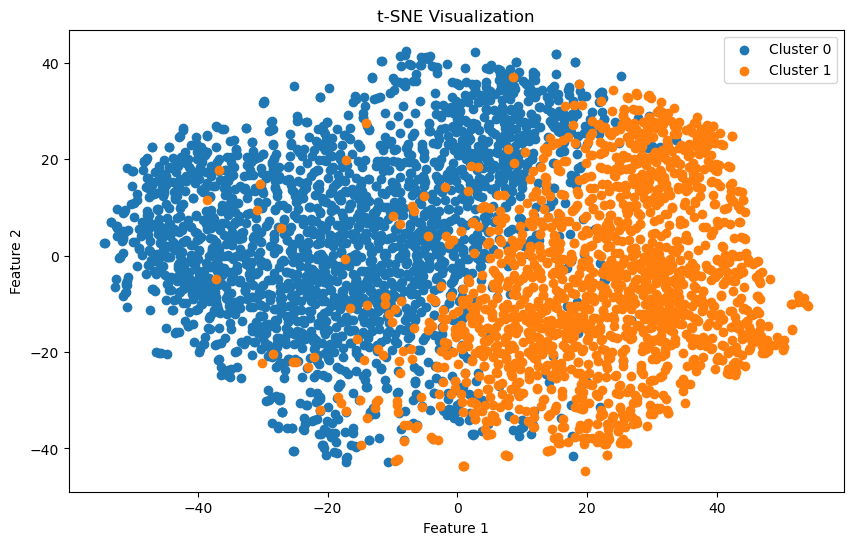

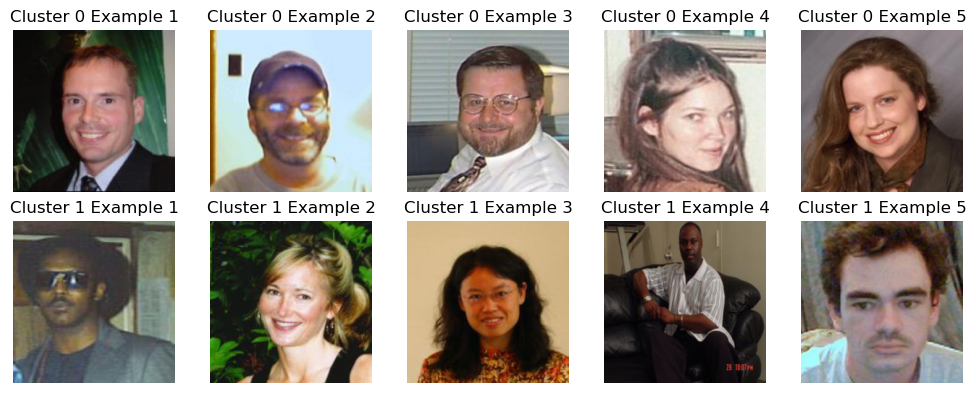

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


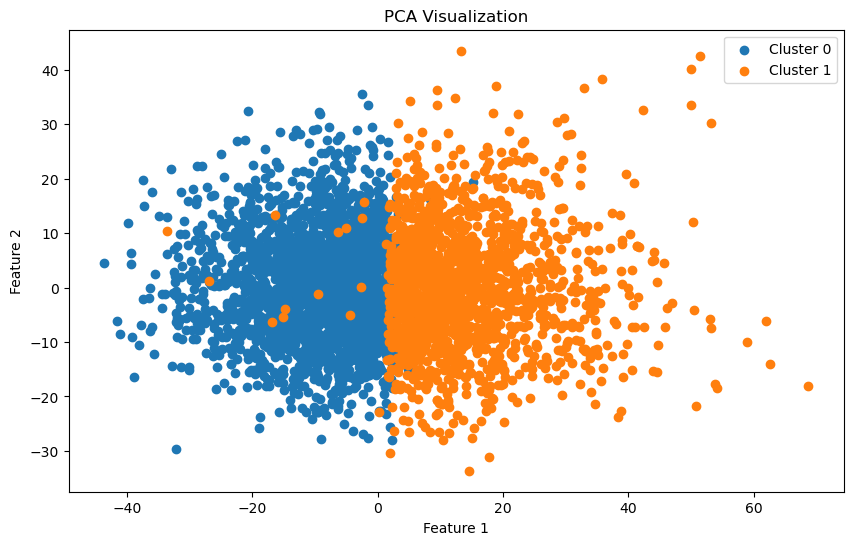

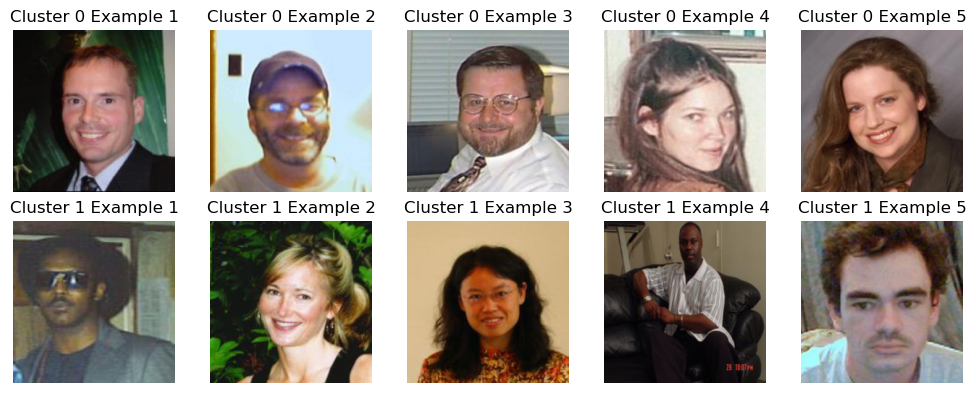

In [ ]:
cluster_labels = cluster(dataloader, vggnet, 'TSNE')
show_cluster_examples(dataloader, cluster_labels, 5)
cluster_labels = cluster(dataloader, vggnet, 'PCA')
show_cluster_examples(dataloader, cluster_labels, 5)

### For **ResNet18**: 

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


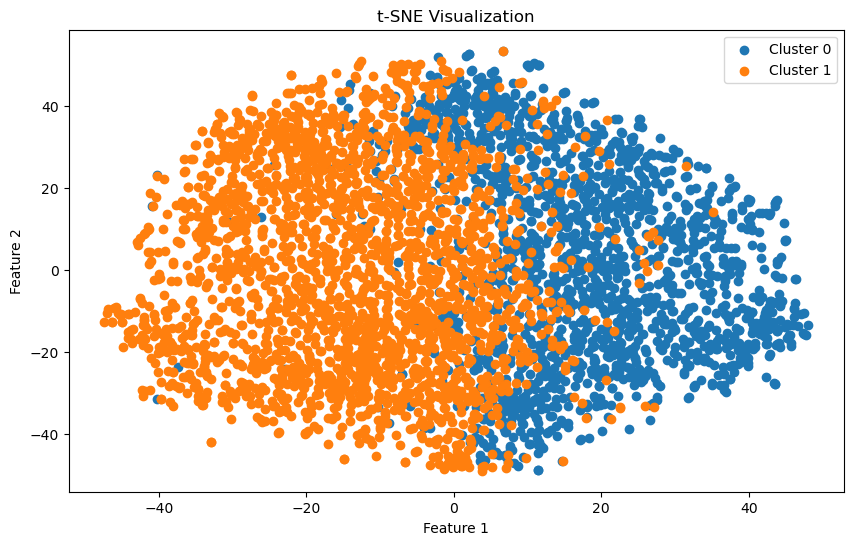

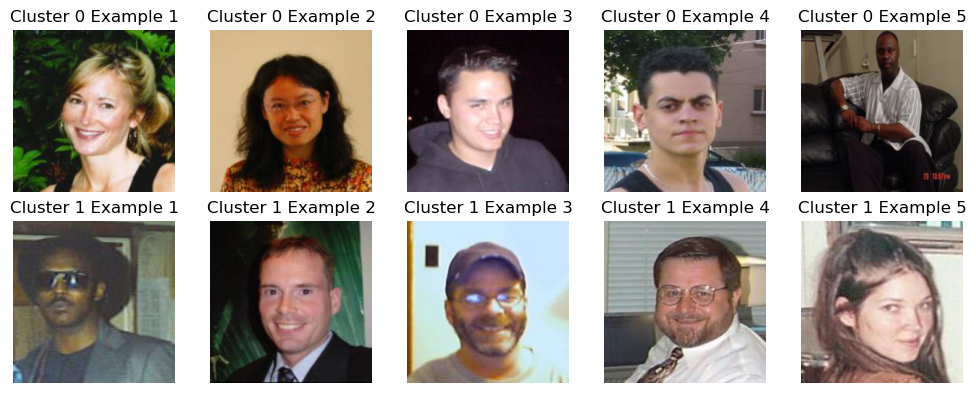

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


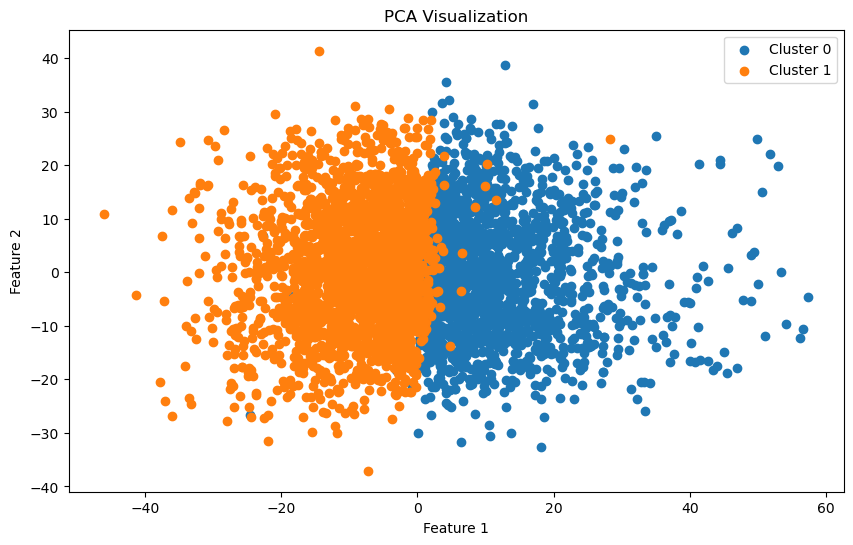

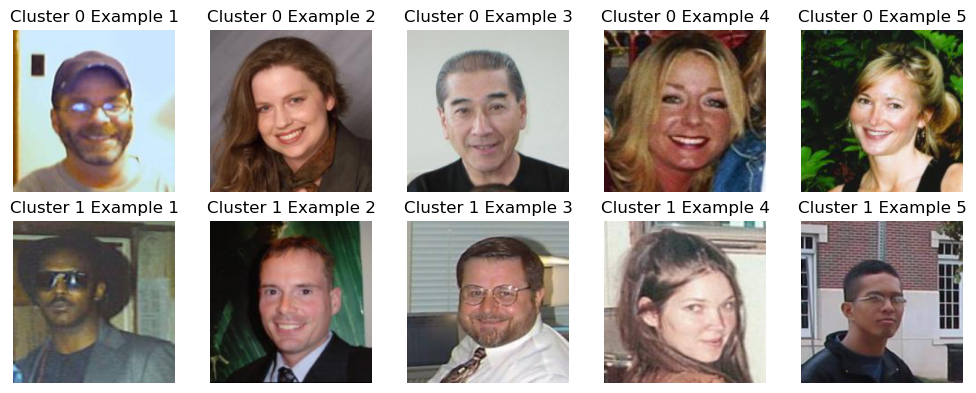

In [174]:
cluster_labels = cluster(dataloader, resnet18, 'TSNE')
show_cluster_examples(dataloader, cluster_labels, 5)
cluster_labels = cluster(dataloader, resnet18, 'PCA')
show_cluster_examples(dataloader, cluster_labels, 5)

### For **MobileNet**: 

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


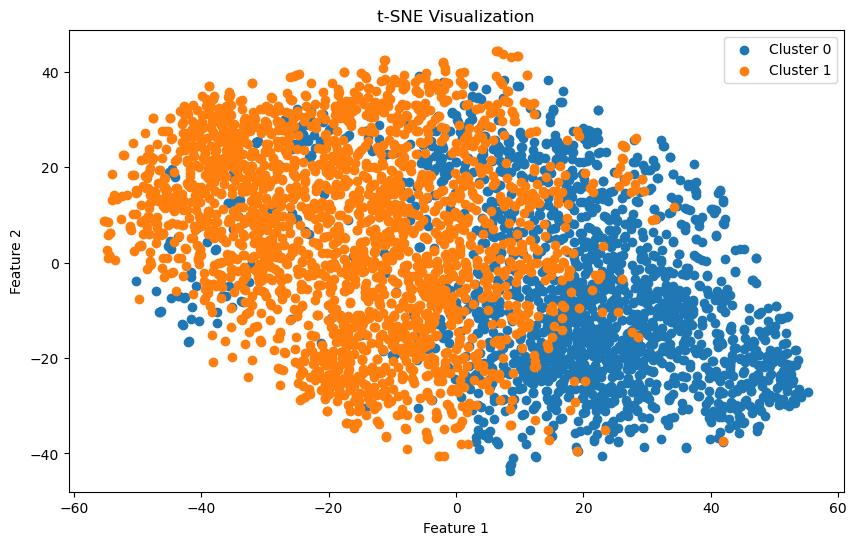

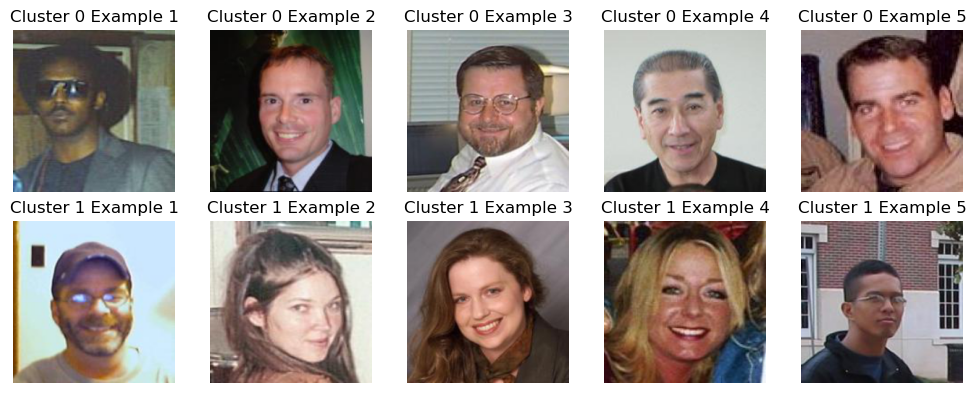

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


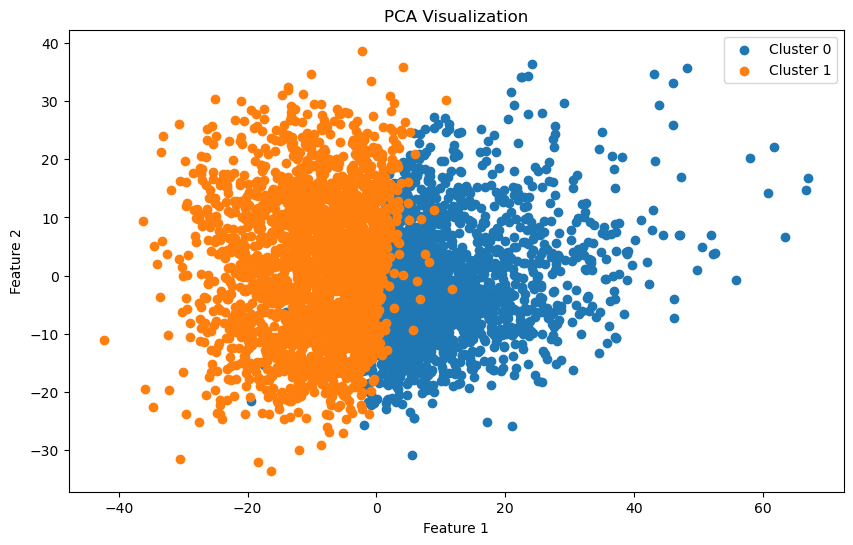

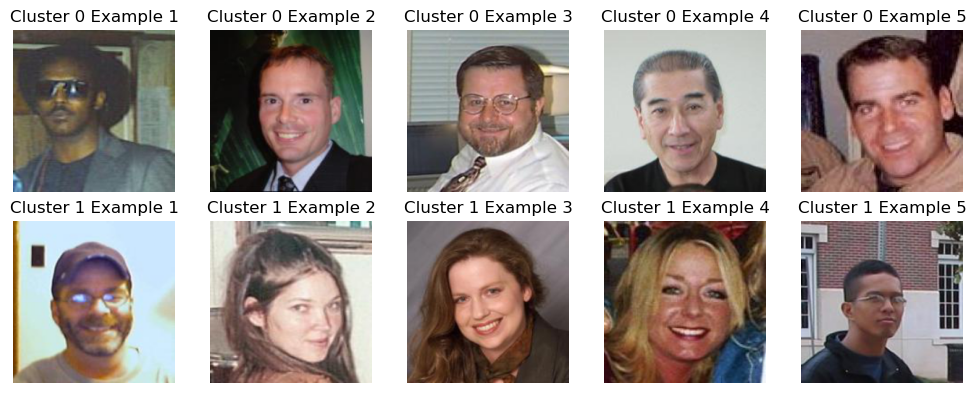

In [175]:
cluster_labels = cluster(dataloader, mobilenet, 'TSNE')
show_cluster_examples(dataloader, cluster_labels, 5)
cluster_labels = cluster(dataloader, mobilenet, 'PCA')
show_cluster_examples(dataloader, cluster_labels, 5)

### For **GoogLeNet**: 

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


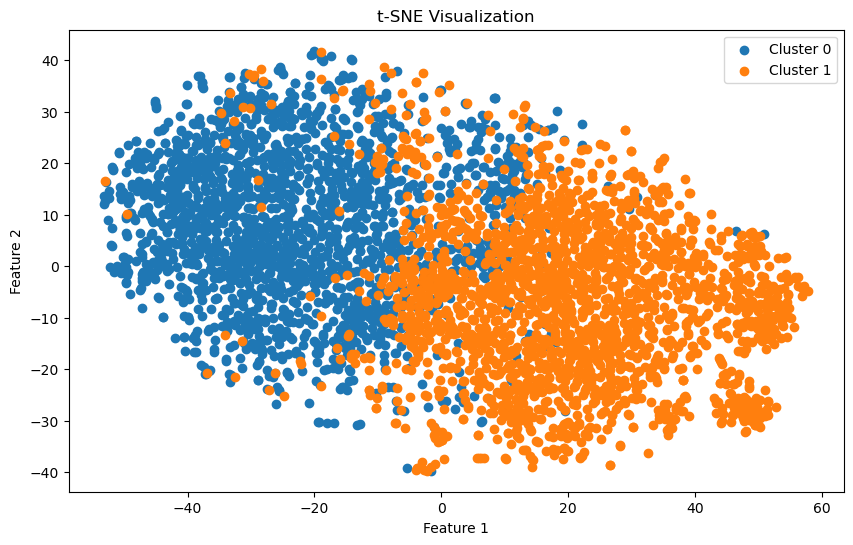

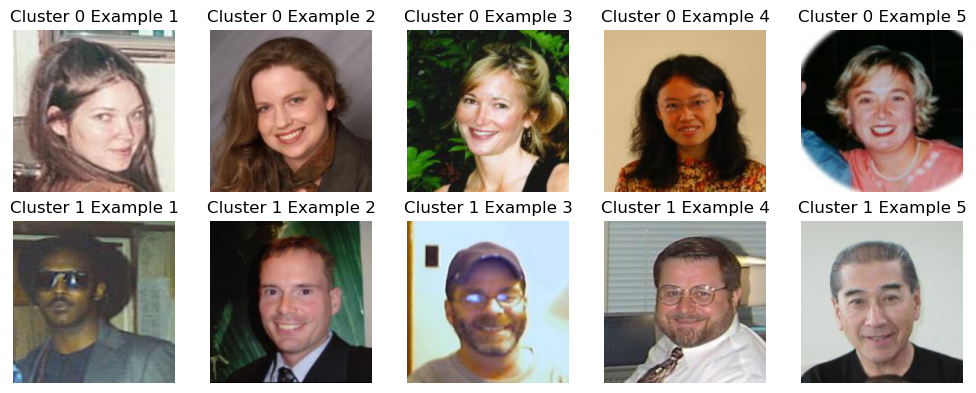

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


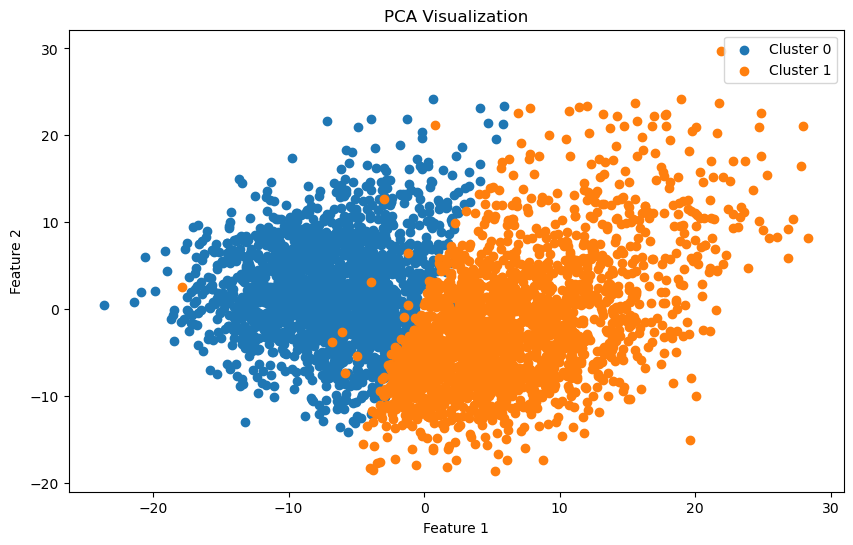

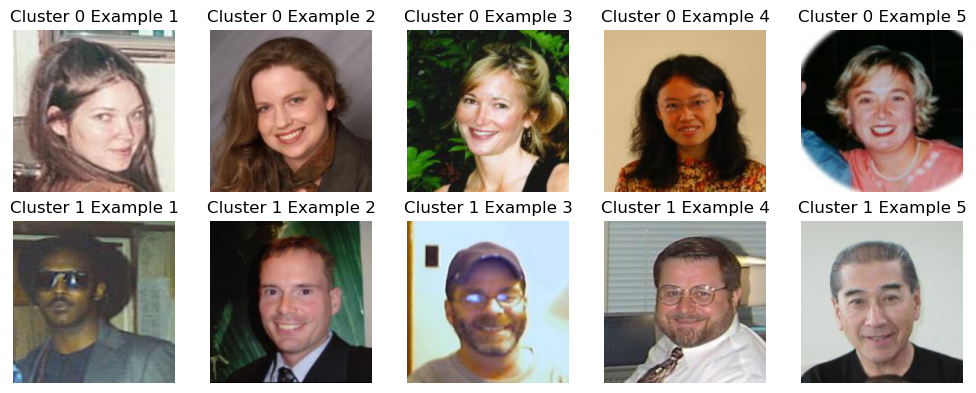

In [176]:
cluster_labels = cluster(dataloader, googlenet, 'TSNE')
show_cluster_examples(dataloader, cluster_labels, 5)
cluster_labels = cluster(dataloader, googlenet, 'PCA')
show_cluster_examples(dataloader, cluster_labels, 5)

### For **InceptionResnetV1**: 

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


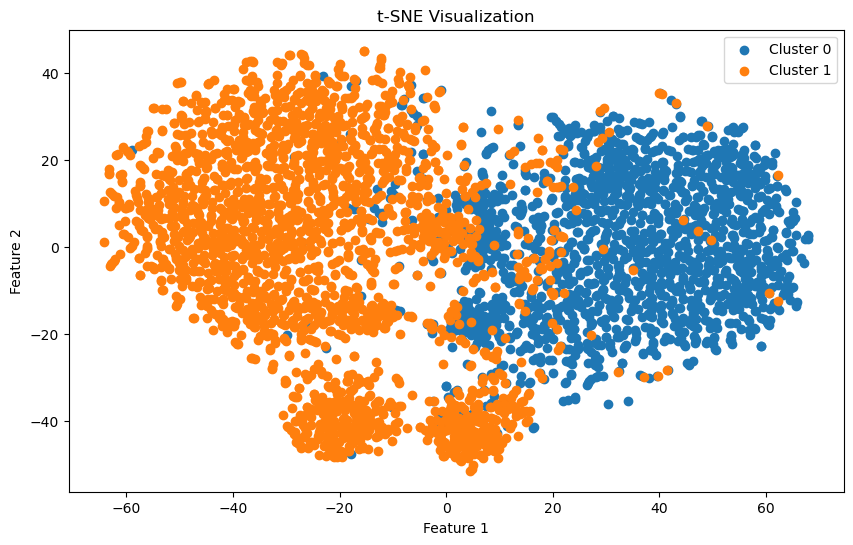

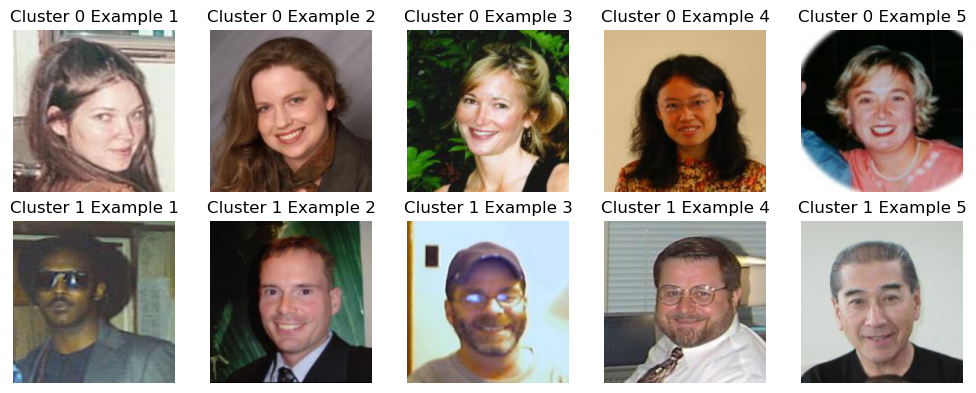

/home/whs/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


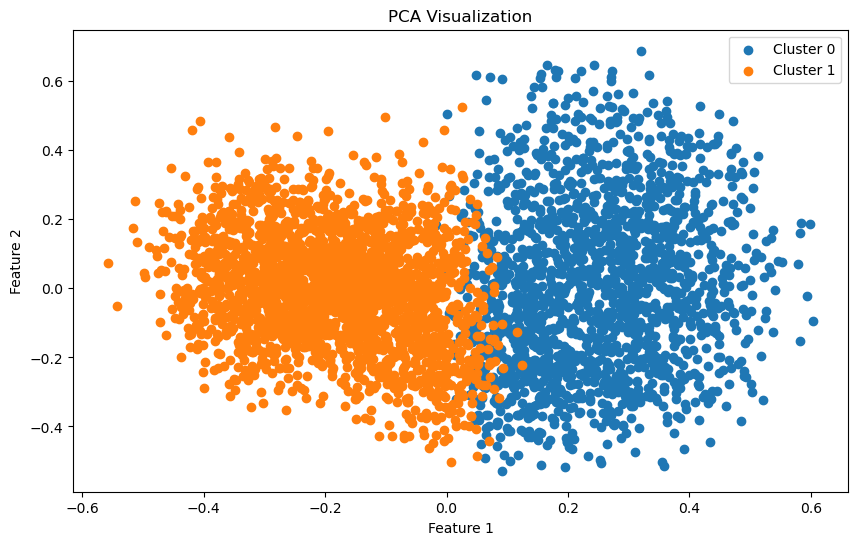

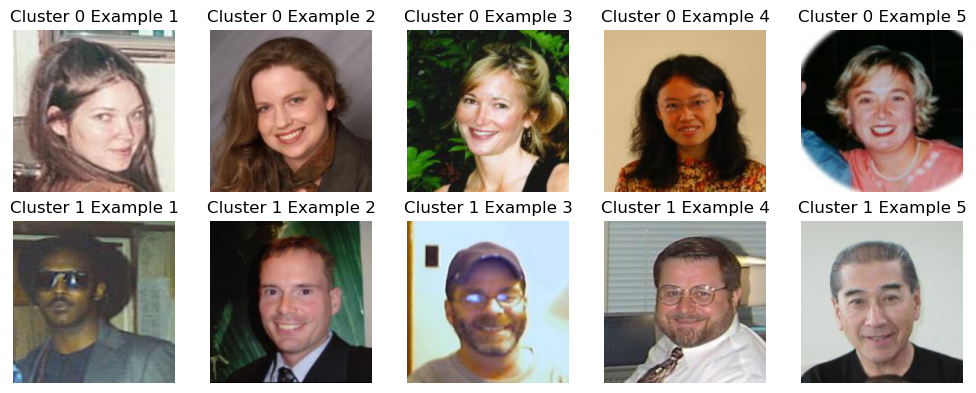

In [177]:
cluster_labels = cluster(dataloader, incepResnet, 'TSNE')
show_cluster_examples(dataloader, cluster_labels, 5)
cluster_labels = cluster(dataloader, incepResnet, 'PCA')
show_cluster_examples(dataloader, cluster_labels, 5)

###  For similar face recognition: 

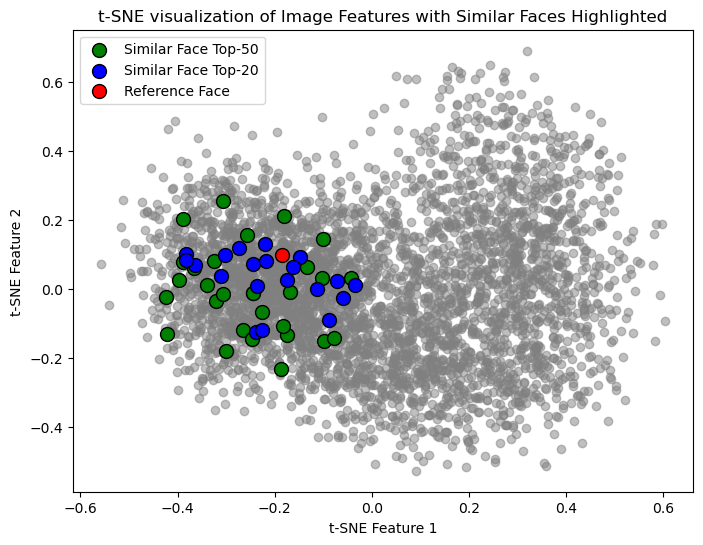

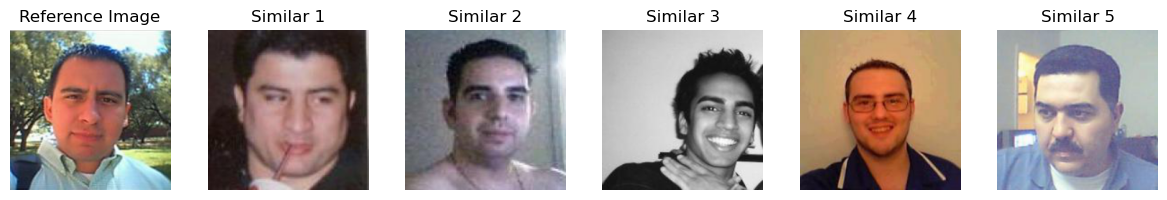

In [178]:
similar_indices = cluster_similar_faces(dataloader, incepResnet)
show_similar_examples(dataloader, similar_indices, n_examples=5)

### For the Experimental Results:

#### For Different Machine Learning Models:

- **Visual Clustering**:
  - From the perspective of visual clustering, they all have good results. However, when combined with some of the examples shown, it is not difficult to find that there are no obvious characteristics between different clusters except for GoogLeNet and InceptionResnetV1. GoogLeNet and InceptionResnetV1 are clustered according to gender.

- **Analysis**:
  - We believe that the reason is that the remaining models are pre-trained on ImageNet, and the Genki4k dataset is a face dataset, so the pre-trained parameters cannot extract the features of the Genki4k dataset very well.
  - And GoogLeNet benefits from its special inception module, InceptionResnet is a model specially applied to human faces. Therefore, both of them can extract gender features very well.

#### For Different Dimensionality Reduction Algorithms:

- **Overall Performance**:
  - Both t-SNE and PCA algorithms can complete dimensionality reduction work for clustering tasks well.

- **Comparison between t-SNE and PCA**:
  - Compared with t-SNE, the clustering visualization results under the PCA algorithm have a more compact distribution and clearer boundaries.

- **Impact of Different Algorithms on the Same Model**:
  - For the same model, different algorithms have almost no impact on the final clustering results.

#### For Similar Face Recognition:

- **Clustering Results**:
  - The clustering results are in line with expectations. The Top-20 and Top-50 similar samples are both near the reference sample, and the Top-20 samples are closer than the Top-50 samples.

- **Observations from Examples**:
  - In the example shown, they do have some similarities intuitively (note that each image in the Genki4k dataset is not related).
  

# 9 Conclusions

### Conclusion

The experimental results from various machine learning models and dimensionality reduction algorithms on the Genki4k dataset provide insightful observations and conclusions in the fields of visual clustering, algorithm analysis, and similar face recognition.

#### Machine Learning Models

1. **Visual Clustering**:
   - Models like GoogLeNet and InceptionResnetV1 demonstrated distinct clustering capabilities, particularly in gender classification. This is likely due to GoogLeNet's unique inception module and InceptionResnet's specialization in facial features.
   - Other models, despite their overall good performance, showed less distinct clustering characteristics. This is attributed to their pre-training on the ImageNet dataset, which is not specifically tailored for facial datasets like Genki4k.

2. **Model Analysis**:
   - The success of GoogLeNet and InceptionResnetV1 underscores the importance of model architecture and specialization in extracting relevant features from specific datasets, such as Genki4k for facial recognition tasks.

#### Dimensionality Reduction Algorithms

1. **Overall Performance**:
   - Both t-SNE and PCA effectively reduced dimensions for clustering tasks, demonstrating their utility in simplifying complex data for analysis.

2. **t-SNE vs. PCA**:
   - PCA showed a more compact distribution with clearer boundaries compared to t-SNE, indicating its efficiency in maintaining data variance and cluster separation.

3. **Algorithm Impact on Models**:
   - The choice of dimensionality reduction algorithm (t-SNE or PCA) did not significantly affect the final clustering results for a given model, suggesting that model selection might play a more crucial role than the choice of dimensionality reduction technique.

#### Similar Face Recognition

1. **Clustering Results**:
   - The clustering outcomes met expectations, with the Top-20 and Top-50 similar samples clustering close to the reference sample, and the Top-20 being more proximate than the Top-50.

2. **Observational Insights**:
   - The intuitive similarities observed in the example images from the Genki4k dataset, despite no known relationships between them, highlight the effectiveness of the employed models and algorithms in recognizing and grouping similar facial features.

These conclusions emphasize the significance of model and algorithm selection in machine learning tasks, especially in applications involving specialized datasets. The effectiveness of models like GoogLeNet and InceptionResnetV1 in gender-based clustering and the comparative analysis of t-SNE and PCA in dimensionality reduction are particularly noteworthy. Furthermore, the clustering results in similar face recognition validate the practical utility of these models and algorithms in real-world applications.